        # 1. Passive learning without random policy

We set a discount factor $\gamma = 0.95$ as we consider that future reward are very important. However, we don't set $\gamma = 0.95$ as we want to penalize state that are far from the solution

In [4]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [5]:
agent = PassiveAgentTD(env, gamma=0.95, debug=False)
agent.learning(trials=100)
agent.print_u_table()

learning completed
[6, 0]    [5, 0]    [4, 0]    [3, 0]    [2, 0]    [1, 0]    [0, 0]    [0, 1]    [0, 2]    [0, 3]    [0, 4]    [0, 5]    [0, 6]    [0, 7]    [0, 8]    [0, 9]    [0, 10]   
0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         
-0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     -0.91     909.09    
-1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      -1.7      718.71    984.85    
-2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     -2.41     524.05    884.78    996.5     
-3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04     -3.04 

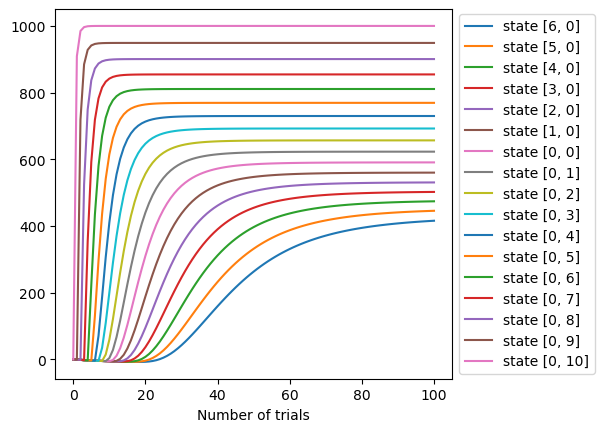

In [6]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

#mise en évidence de la convergence de la fonction utilities a chaque état etat proche du point de départ vont cv plus rapidement que ceux qui sont éloigné montre la cv de l(utilitie pour chacun des etat au fur et a mesure des trials

In [7]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  590.64   622.83   656.68   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0            
1  559.94                                                                                                      
2  530.53                                                                                                      
3  502.05                                                                                                      
4  473.94                                                                                                      
5  445.44                                                                                                      
6  415.6                                                                                                       


# 2. Passive learning with a random policy

In [1]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [2]:
agent = PassiveAgentTD(env, seed=0, gamma=0.95, random_policy=True, debug=False)
agent.learning(trials=500)

learning completed


In [3]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  15.04    33.73    53.58    68.8     88.22    106.77   162.13   216.28   260.02   374.1    655.01   0        
1  5.78     16.66    38.68    51.95    67.73    77.95    104.15   159.88   210.55   258.03   350.76   300.56   
2  5.37     10.92    35.56    52.12    64.32    68.64    90.27    136.4    181.59   181.95   189.69   95.96    
3  4.5      10.46    20.44    40.76    58.24    60.12    83.77    121.07   104.35   136.79   120.65   71.89    
4  2.74     7.15     8.84     10.06    36.31    39.13    44.64    32.05    44.04    55.4     42.6     41.45    
5  2.71     5.13     5.11     5.94     10.19    10.82             24.59    30.33    42.09    31.41    23.7     
6  1.59     2.18     1.65     5.38     8.64     7.92              18.52    21.77    37.36    24.26    20.67    


# 3. Active learning with Q-function

In [10]:
from environment import Maze
from agent import ActiveAgentQLearning

row, col = 10,12

env = Maze(row, col, seed=4, ratio_obstacles=0.2,ratio_hole=0.4)

env.render()

0    |#|.|.|#|#|P|#|.|.|#|#|.|
1    |.|#|#|#|#|#|.|#|#|.|.|.|
2    |#|.|.|.|P|C|.|.|.|.|#|#|
3    |#|.|.|.|.|#|#|#|#|.|P|#|
4    |#|C|.|P|#|A|.|.|#|P|#|.|
5    |#|.|.|.|.|#|P|.|#|.|#|#|
6    |#|.|.|.|.|.|.|.|#|.|#|.|
7    |.|#|.|.|P|.|#|#|#|.|#|#|
8    |.|.|.|.|.|E|P|.|.|.|#|#|
9    |#|P|#|#|#|.|#|P|#|#|.|P|



In [4]:
agent = ActiveAgentQLearning(env, q_min=2000, n_min=20, gamma=0.95, debug=False)
agent.learning(trials=50)

learning completed


In [ ]:
agent.play("gui")

## utility for each state

In [5]:
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(round(utilities[i*col + j].item(), 2))), end=" ")
    print()

IndexError: index 33 is out of bounds for dimension 0 with size 33

## State representation

In [6]:
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(i*col + j)), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  0        1        2        3        4        5        6        7        8        9        10       11       
1  12       13       14       15       16       17       18       19       20       21       22       23       
2  24       25       26       27       28       29       30       31       32       33       34       35       
3  36       37       38       39       40       41       42       43       44       45       46       47       
4  48       49       50       51       52       53       54       55       56       57       58       59       
5  60       61       62       63       64       65       66       67       68       69       70       71       
6  72       73       74       75       76       77       78       79       80       81       82       83       
7  84       85       86       87       88       89       90       91       92       93       94       95

In [8]:
agent.play()

0    |#|.|.|#|#|P|#|.|.|#|#|.|
1    |.|#|#|#|#|#|.|#|#|.|.|.|
2    |#|.|.|.|P|C|.|.|.|.|#|#|
3    |#|.|.|.|.|#|#|#|#|.|P|#|
4    |#|C|.|P|#|.|.|.|#|P|#|.|
5    |#|.|.|.|.|#|P|.|#|.|#|#|
6    |#|.|.|.|.|.|.|.|#|.|#|.|
7    |.|#|.|.|P|.|#|#|#|.|#|#|
8    |.|.|.|.|.|A|P|.|.|.|#|#|
9    |#|P|#|#|#|.|#|P|#|#|.|P|

Partie terminée


# 3. Linear Regression

In [10]:
from environment import SimpleMaze
from agent import ActiveAgentRegressionLearning

row, col = 5, 5

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|E|
1  |.|.|.|.|.|
2  |.|.|.|.|.|
3  |.|.|.|.|.|
4  |C|.|.|.|.|



In [ ]:
agent = ActiveAgentRegressionLearning(env, q_min=2000, n_min=20, gamma=0.95, debug=False)
agent.learning(trials=200)

In [ ]:
agent.play()

In [5]:
import torch
X = [[0,0,0,0]]
X
Y = [1,2,1,1]
Y
X.append(Y)
X

[[0, 0, 0, 0], [1, 2, 1, 1]]

In [9]:
X.size()

AttributeError: 'list' object has no attribute 'size'

In [ ]:
chargement csv
creation matrice
init

In [27]:
import torch
x = torch.ones((1,3))
x

tensor([[1., 1., 1.]])

In [26]:
Y = [1,2,3,4]

for i in Y:
    print(i)

1
2
3
4


In [4]:
import torch

pt = torch.tensor([[1,  3, 7],
                   [2,  4, 8],
                   [1.5,5,9]])

ht = torch.tensor([[5,4,3],
                   [2,3,2],
                   [2,1,8]])

repIA = torch.tensor([[2,1,0],  #B
                      [0,0,4],  #S
                      [0,0,0]]) #H

tactuel = 2

In [5]:
"""On veut récup les données qu'on a recu"""

"On veut récup les données qu'on a recu"

In [6]:
ptb = pt[tactuel,:] * 1 # récup les derniers prix de la bourse on va lui appliquer une commission d('achat)
ptb

tensor([1.5000, 5.0000, 9.0000])

In [7]:
ktb = repIA[0]
ktb

tensor([2, 1, 0])

In [8]:
pts = pt[tactuel] * 1 # récup les derniers prix de la bourse on va lui appliquer une commission d('achat)
pts

tensor([1.5000, 5.0000, 9.0000])

In [9]:
kts = repIA[1]
kts

tensor([0, 0, 4])

In [10]:
pkb = torch.matmul(ptb,ktb.float())
pkb

tensor(8.)

In [11]:
pks = torch.matmul(pts,kts.float())
pks

tensor(36.)

In [12]:
bt = 100

bt1 = bt + pks - pkb
bt1.item()

128.0

In [13]:
"""on doit appliquer les changement dans ht
pt = torch.tensor([[1,  3, 7],
                   [2,  4, 8],
                   [1.5,5,9]])

ht = torch.tensor([[5,4,3],
                   [2,3,2],
                   [2,1,8]])

repIA = torch.tensor([[2,1,0],  #B
                      [0,0,4],  #S
                      [0,0,0]]) #H
"""

'on doit appliquer les changement dans ht\npt = torch.tensor([[1,  3, 7],\n                   [2,  4, 8],\n                   [1.5,5,9]])\n\nht = torch.tensor([[5,4,3],\n                   [2,3,2],\n                   [2,1,8]])\n\nrepIA = torch.tensor([[2,1,0],  #B\n                      [0,0,4],  #S\n                      [0,0,0]]) #H\n'

In [14]:
tactuel = 2
ht[tactuel]

tensor([2, 1, 8])

In [15]:

btfutur = 120

In [16]:
bt = torch.tensor([120])

In [17]:
btfutur = torch.tensor([150])

In [18]:
bt = torch.cat((bt,btfutur))

In [19]:
tactuel=1
bt[tactuel]

tensor(150)

In [20]:
"""calcul de la turbulence"""

'calcul de la turbulence'

In [21]:
pt = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10,11,12],
                   [13,14,15]])

bt =torch.tensor([10000,11000,9000,12000,100000])

In [25]:
périodechoisi = 3
tactuel = 4
y = (bt[tactuel] -  bt[tactuel-1] )/ bt[tactuel-1]

mu = 12

In [26]:
y

tensor([0.3000, 0.2727, 0.2500])

In [23]:
covariance = torch.cov(y-mu)
covariance

C:\Users\adcol\AppData\Local\Temp\ipykernel_125496\850370336.py:1: UserWarning: cov(): degrees of freedom is <= 0 (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Correlation.cpp:100.)
  covariance = torch.cov(y-mu)


tensor(nan)

In [24]:
y

tensor(7.3333)